<a href="https://colab.research.google.com/github/twyeh/university-physics/blob/main/%E6%96%9C%E9%9D%A2%E9%81%8B%E5%8B%95%E5%AF%A6%E9%A9%97%E5%88%86%E6%9E%90_%E5%9F%BA%E7%A4%8E%E7%89%88(20241010).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

載入基本模組

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# 斜面運動實驗
## 前言
在四百多年前，伽利略進行了斜面運動實驗，探討物體在斜面上運動時，位移與時間之間的關係，從而發現位移只與時間有關，而與速度無關。同時還發現，可以利用數學建立位移與時間的關係，進而為後續牛頓與笛卡爾的時間與空間的觀點奠定基礎。
在本次探究活動中，我們要利用探究式斜面運動實驗，重複伽利略當年的實驗，並利用python作為計算工具，分析實驗數據，以建立 位移-時間、速度-時間、加速度-時間的數學模型。
## 問題
本實驗透過斜面運動探討下列三個問題：


1.   位置對時間的關係為何？
2.   如何根據1.的結果探討平均速度對時間的關係為何？
3.   如何根據2.的結˙果平均加速度對時間的關係為何？

## 位置與時間關係實驗
###活動目標
自長度為$L=1.00\,\text{m}$，高度為$h=0.10\,\text{m}$的斜面頂端一顆塑膠圓球自由地沿斜面滾下，並開始計時。在間隔$0.1\,\text{m}$的位置$x_i=0.1i, i=0,1,2,3,\cdots,10$，測量對應的時間$t_i$。

In [ ]:
無

將實驗數據輸入變數  x_data 及t_data

In [ ]:
x_data=([0.00,0.10,0.2,0.30,0.40,0.50,0.60,0.70,0.80,0.90,1.00])
t_data=([0.00,0.44,0.63,0.77,0.89,1.00,1.09,1.18,1.26,1.34,1.41])

In [ ]:
np.random.seed(1)
err_stdev = 0.05
# 生成均值为0，标准差为err_stdev为0.2的高斯噪声
t_noise = np.absolute(err_stdev*np.random.normal(size=len(x_data)))
t_noise

array([0.08121727, 0.03058782, 0.02640859, 0.05364843, 0.04327038,
       0.11507693, 0.08724059, 0.03806035, 0.01595195, 0.01246852,
       0.0731054 ])

繪製$x-t$關係圖

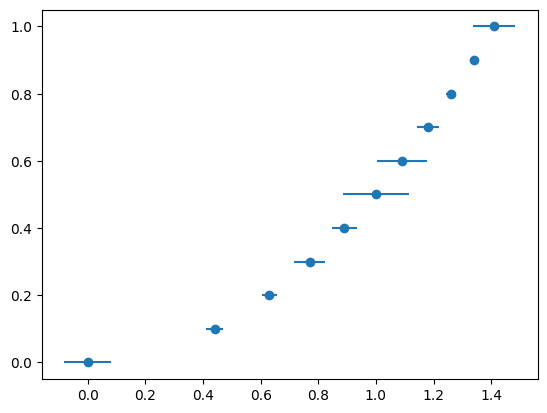

In [ ]:
xdata = np.asarray(t_data)
ydata = np.asarray(x_data)
xerror = np.asarray(t_noise)
plt.errorbar(xdata, ydata, yerr=0, xerr=xerror, fmt='none')
plt.plot(xdata, ydata, 'o')
plt.show()

## 建立解釋模型
假設模型

   model : $x=at^b$


分別對其進行最小平方擬合，計算其對應的卡方檢測量 $\chi^2$最小時的 $a, b$ 值。


因為要配合下面使用的函數：
 curve_fit(fun, xdata, ydata, sigama=ydata_error)
*   假設 fun　的形式為 yth = fun(xdata, parameters)。
*   函數 fun 的定義必須第一個參數為輸入 xdata,
*   第二個為需要計算參數 parameters，並作為輸出資料。
*   fun 根據定義的模型 $y=A*x^B $，
*   依序將 xdata 中的數據讀入後，計算其理論值 $y_i=A*x_i^B $，
*   第三個輸入 sigma=ydata_error, 其中 ydata_error為 ydata　的標準誤差。
*   此函數乃利用最小平方法計算所謂的 $\chi^2$ 函數
\begin{equation}
\chi^2=\sum_{i=1}^{N}\frac{(f(\text{xdata}_i)-\text{ydada}_i)^2}{\text{ydata_error}_i^2}
\end{equation}
的最小值，以得到函數中定義的模型參數 $A, B$。
*   計算輸出：parameters, covariance
*   parameters={A, B}:計算的參數的平均值
*   covariance={c_{ii}}：參數的變異值  

In [ ]:
# Define the Model function
def Model(x, A, B):
    return  A*np.power(x,B)


利用 curve_fit(fun, xdata, ydata) 函數根據計算數據的迴歸分析，回傳值為 parameters (決定的參數), covariance (誤差).

In [ ]:
x_param, x_covar = curve_fit(Model, xdata, ydata)
print(x_param)
print(x_covar)

[0.50371751 1.99211208]
[[ 5.93062283e-07 -3.48160870e-06]
 [-3.48160870e-06  3.44769030e-05]]


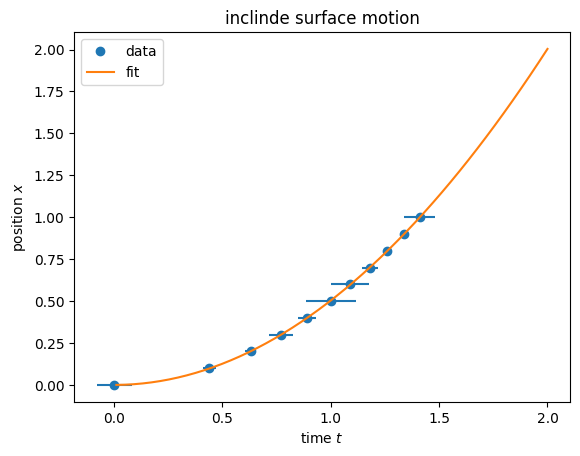

In [ ]:
t = np.linspace(0.01, 2)
fit_y = Model(t, *x_param)
plt.errorbar(xdata, ydata, yerr=0, xerr=xerror, fmt='none')
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(t, fit_y, '-', label='fit')
plt.legend()
plt.xlabel('time $t$')
plt.ylabel('position $x$')
plt.title('inclinde surface motion')
plt.show()

In [ ]:
SE = np.sqrt(np.diag(x_covar))
SE_A = SE[0]
print(F'The value of A and B are {x_param[0]:.2f} and {x_param[1]:.2f} with standard error of {SE_A:.2f}.')

The value of A and B are 0.50 and 1.99 with standard error of 0.00.


##  速度對時間的關係
### 活動目標
根據位置實驗數據，計算各段位移的平均速度，並計算其對應的中點時間

In [ ]:
#定義 v_avg 及 tv_mid 矩陣
v_avg=[]
tv_mid=[]
for i in np.arange(9):
  del_x=x_data[i+1]-x_data[i]
  del_t=t_data[i+1]-t_data[i]
  v_avg.append((del_x/del_t))
  tv_mid.append((t_data[i+1]+t_data[i])/2)
v_avg=np.asarray(v_avg)
tv_mid=np.asarray(tv_mid)

In [ ]:
v_param, v_covar = curve_fit(Model, tv_mid, v_avg)
print(v_param)
print(v_covar)

[0.99962717 0.97735228]
[[ 0.00017878 -0.00011043]
 [-0.00011043  0.0027337 ]]


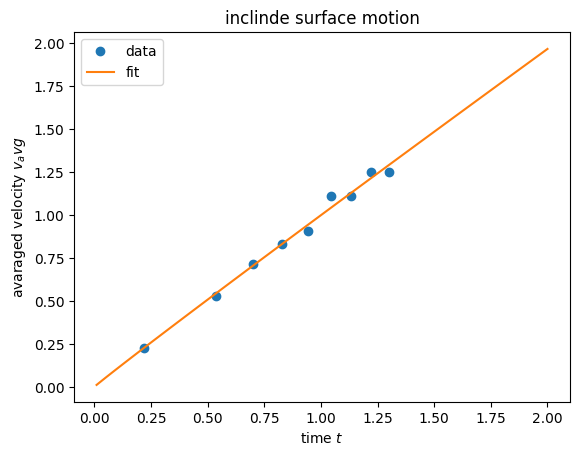

In [ ]:
fit_y = Model(t, *v_param)
plt.plot(tv_mid, v_avg, 'o', label='data')
plt.plot(t, fit_y, '-', label='fit')
plt.legend()
plt.xlabel('time $t$')
plt.ylabel('avaraged velocity $v_avg$')
plt.title('inclinde surface motion')
plt.show()

In [ ]:
SE = np.sqrt(np.diag(v_covar))
SE_A = SE[0]
print(F'The value of A and B are {v_param[0]:.2f} and {v_param[1]:.2f} with standard error of {SE_A:.2f}.')

The value of A and B are 1.00 and 0.98 with standard error of 0.01.


##加速度對時間的關係
### 活動目標
根據速度數據，計算各段位移的平均加速度，並計算其對應的中點時間

In [ ]:
#定義 a_avg 及 ta_mid 矩陣
a_avg=[]
ta_mid=[]
for i in np.arange(8):
  del_v=v_avg[i+1]-v_avg[i]
  del_ta=tv_mid[i+1]-tv_mid[i]
  a_avg.append((del_v/del_ta))
  ta_mid.append((tv_mid[i+1]+tv_mid[i])/2)
a_avg=np.asarray(a_avg)
ta_mid=np.asarray(ta_mid)

In [ ]:
a_param, a_covar = curve_fit(Model, ta_mid, a_avg)
print(a_param)
print(a_covar)

[ 0.8755869  -0.23550128]
[[0.08899057 0.11043759]
 [0.11043759 0.51957407]]


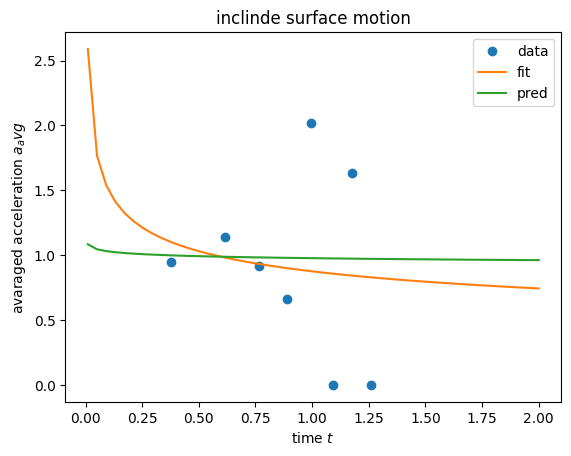

In [ ]:
fit_y = Model(t, *a_param)
pred_y = Model(t,v_param[0]*v_param[1],(v_param[1]-1))
plt.plot(ta_mid, a_avg, 'o', label='data')
plt.plot(t, fit_y, '-', label='fit') # fit of acceleration data
plt.plot(t, pred_y, '-', label='pred') # prediction from the v_fit model
plt.legend()
plt.xlabel('time $t$')
plt.ylabel('avaraged acceleration $a_avg$')
plt.title('inclinde surface motion')
plt.show()

In [ ]:
SE = np.sqrt(np.diag(a_covar))
SE_A = SE[0]
print(F'The value of A and B are {a_param[0]:.2f} and {a_param[1]:.2f} with standard error of {SE_A:.2f}.')

The value of A and B are 0.88 and -0.24 with standard error of 0.30.


## 結論
### 位移對時間關係
根據實驗數據得到的模型為
$$ x(t)=0.50\times t^{1.99}$$
誤差 $0.00$
### 速度對時間關係
根據實驗數據得到的模型為
$$ v(t)=1.00\times t^{0.98}$$
誤差 $0.01$
### 加速度對時間關係
根據實驗數據得到的模型為
$$ a(t)= 0.88 \times t^{-0.24}$$
誤差 $0.30$

因為誤差累加的關係，加速度的誤差 > 速度的誤差 > 位移的誤差。

###誤差原因分析

在計算平均速度時，假設平均速度所對應的時間可能為位移中點的時間，但此假設未有具體證據以保證其正確。同理，計算平均加速度時，亦假設其對應時間為此段速度變化過程的中點時間。

分析結果顯示，根據此假設所計算得到平均速度及平均加速度接存在誤差，且平均速度的誤差累加至平均加速度。

如何改進造成誤差的推論方法呢？

分析探討留待下一篇斜面運動實驗進階版。